In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf


In [ ]:
# Load dataset
# Replace 'your_dataset.csv' with your actual dataset path
data = pd.read_csv("./datasets/scaled_network_traffic_cleaned.csv")

In [3]:
data=pd.DataFrame(data)
print(data)

                                        Flow ID  Source Port  \
0       192.168.10.5-104.16.207.165-54865-443-6     0.006760   
1         192.168.10.5-104.16.28.216-55054-80-6     0.001221   
2         192.168.10.5-104.16.28.216-55055-80-6     0.001221   
3       192.168.10.16-104.17.241.25-46236-443-6     0.006760   
4       192.168.10.5-104.19.196.102-54863-443-6     0.006760   
...                                         ...          ...   
225740     192.168.10.15-72.21.91.29-61374-80-6     0.001221   
225741     192.168.10.15-72.21.91.29-61378-80-6     0.001221   
225742     192.168.10.15-72.21.91.29-61375-80-6     0.001221   
225743    192.168.10.15-8.41.222.187-61323-80-6     0.001221   
225744      192.168.10.15-8.43.72.21-61326-80-6     0.001221   

        Destination Port  Protocol  Timestamp  Flow Duration  \
0               0.837225  0.352941        0.0   3.333335e-08   
1               0.840109  0.352941        0.0   9.166671e-07   
2               0.840124  0.352941     

In [4]:
data.isnull().sum()

Flow ID               0
Source Port           0
Destination Port      0
Protocol              0
Timestamp             0
                     ..
Idle Max              0
Idle Min              0
Label                 0
Source_IP_Int         0
Destination_IP_Int    0
Length: 85, dtype: int64

In [5]:
data_col=list(data.columns)
print(data_col)


['Flow ID', 'Source Port', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 

In [6]:
# Preprocessing
 # Features (replace "label" with your target column)
X = data.drop(['Flow ID','Label'], axis=1) 

In [7]:

y = data["Label"]# Encoding target variable


In [8]:
print(X.columns)

Index(['Source Port', 'Destination Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance

In [9]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name: Label, Length: 225745, dtype: int64


In [10]:
# x1=data[ 'Source_IP_Int']
# x1=pd.DataFrame(x1)

In [11]:
# Normalize features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


In [12]:
# X= pd.concat([X,x1] ,axis=1)

In [13]:







# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ANN Model
# model = Sequential([
#     Dense(64, input_dim=X.shape[1], activation="relu"),
#     Dropout(0.3),
#     Dense(32, activation="relu"),
#     Dropout(0.3),
#     Dense(1, activation="sigmoid")  # Binary classification
# ])

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Epoch 1/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8475 - loss: 0.3293 - val_accuracy: 0.9950 - val_loss: 0.0163
Epoch 2/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9938 - loss: 0.0239 - val_accuracy: 0.9979 - val_loss: 0.0075
Epoch 3/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9968 - loss: 0.0125 - val_accuracy: 0.9986 - val_loss: 0.0052
Epoch 4/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9978 - loss: 0.0091 - val_accuracy: 0.9989 - val_loss: 0.0045
Epoch 5/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9988 - loss: 0.0060 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 6/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 7/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 8/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9992 - loss: 0.0035 - 

1411/1411 - 1s - 630us/step - accuracy: 0.9998 - loss: 0.0022
Test Loss: 0.002185471821576357
Test Accuracy: 0.9997563362121582


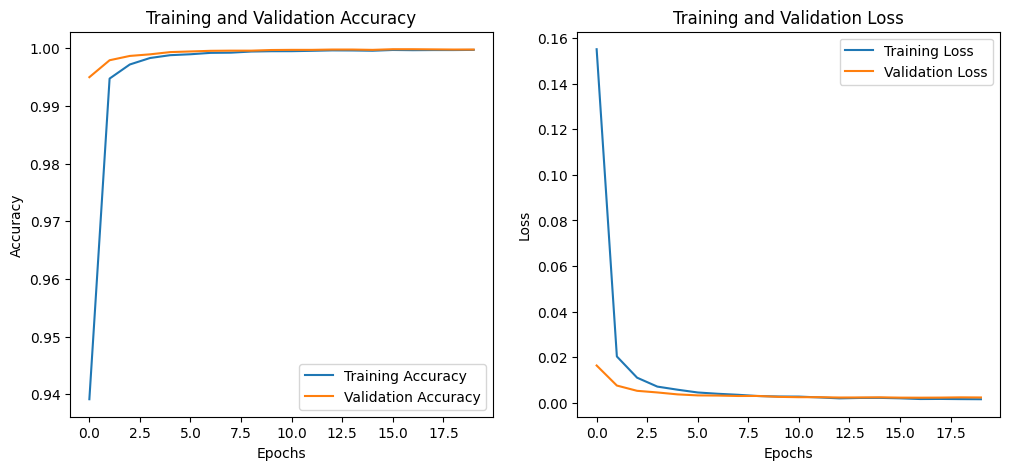

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Print test accuracy and loss
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot the training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()






In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")



1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.9997 - loss: 0.0012
Test Accuracy: 99.98%


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step


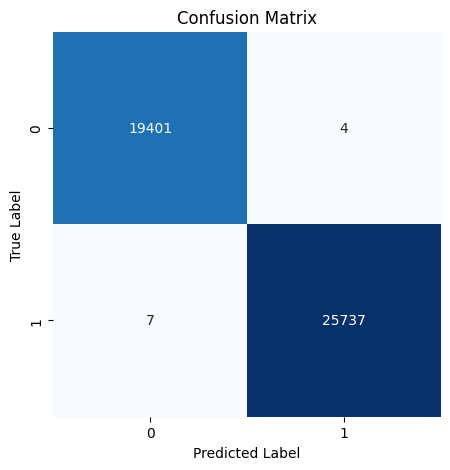

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


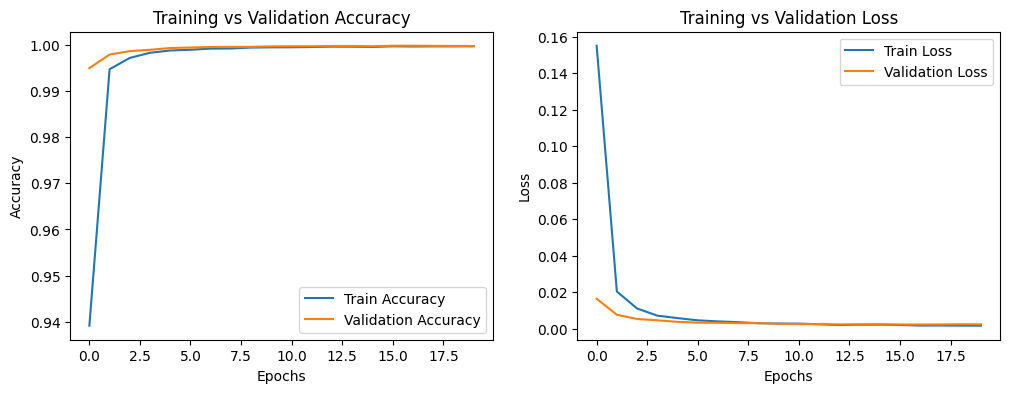

In [17]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()


In [18]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)


5644/5644 ━━━━━━━━━━━━━━━━━━━━ 4s 739us/step - accuracy: 0.9998 - loss: 7.8456e-04
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.9997 - loss: 0.0012


In [19]:
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 99.98%
Test Accuracy: 99.98%
